# Product Invoice Classification

* Inv_ID (Invoice ID) : Unique number representing Invoice created by supplier/vendor

* Vendor Code (Vendor ID) : Unique number representing Vendor/Seller in the procurement system

* GL_Code: Account’s Reference ID

* Inv_Amt : Invoice Amount

* Item Description : Description of Item Purchased Example: “Corporate Services Human Resources Contingent Labor/Temp Labor Contingent Labor/Temp Labor”

* Product Category : Category of Product for which Invoice is raised A pseudo product category is represented in the dataset as CLASS-???, where ? is a digit.* 

## Imports

In [31]:
import pandas as pd
import numpy as np

In [32]:
import scipy as sp

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns; sns.set()

In [33]:
from sklearn.model_selection import train_test_split

## Data

In [89]:
train_data = pd.read_csv('Train.csv')
test_data = pd.read_csv('Test.csv')
sample_submission_data = pd.read_csv('sample_submission.csv')

## Exploration

In [90]:
train_data.head()

,Inv_Id,Vendor_Code,GL_Code,Inv_Amt,Item_Description,Product_Category
0,15001,VENDOR-1676,GL-6100410,83.24,Artworking/Typesetting Production Jun 2009 Cha...,CLASS-1963
1,15002,VENDOR-1883,GL-2182000,51.18,Auto Leasing Corporate Services Corning Inc /N...,CLASS-1250
2,15004,VENDOR-1999,GL-6050100,79.02,Store Management Lease/Rent Deltona Corp Real ...,CLASS-1274
3,15005,VENDOR-1771,GL-6101400,48.50,Store Construction General Requirements Coloni...,CLASS-1522
4,15006,VENDOR-1331,GL-2182000,63.35,Jul 2015 Aydin Corp Contingent Labor/Temp Labo...,CLASS-1376


In [91]:
test_data.head()

,Inv_Id,Vendor_Code,GL_Code,Inv_Amt,Item_Description
0,15003,VENDOR-2513,GL-6050310,56.13,Travel and Entertainment Miscellaneous Company...
1,15008,VENDOR-1044,GL-6101400,96.56,Final Site Clean Up Store Construction Advance...
2,15013,VENDOR-1254,GL-6101400,55.93,Arabian American Development Co Final Site Cle...
3,15019,VENDOR-1331,GL-2182000,32.62,Corporate Services Contingent Labor/Temp Labor...
4,15020,VENDOR-2513,GL-6050310,25.81,Fortune National Corp Miscellaneous Company Ca...


In [37]:
test_data_target = test_data.drop(columns = 'Product_Category').copy()

## Train Data EDA

In [38]:
len(train_data)

5566

In [39]:
train_data.isnull().sum()

Inv_Id              0
Vendor_Code         0
GL_Code             0
Inv_Amt             0
Item_Description    0
Product_Category    0
dtype: int64

In [40]:
tmp = train_data==0 
tmp.sum()

Inv_Id              0
Vendor_Code         0
GL_Code             0
Inv_Amt             0
Item_Description    0
Product_Category    0
dtype: int64

### The Target

In [41]:
len(train_data.Product_Category.unique())

36

In [42]:
#[True if x in test_data.Product_Category.unique() else False for x in train_data.Product_Category.unique()]

In [43]:
to_plot = train_data.groupby('Product_Category', as_index = False).agg(counts = ('Inv_Id','count')).sort_values('counts')

Text(0.5, 1.0, 'Classes')

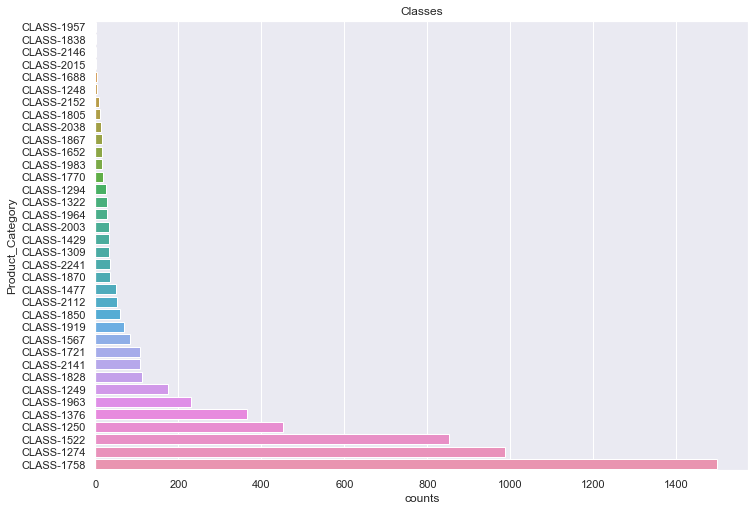

In [44]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot( data= to_plot, x="counts", y = 'Product_Category').set_title("Classes")

In [45]:
to_plot['ranks'] = range(1,len(to_plot)+1)

In [46]:
map_target = dict(to_plot[['Product_Category','ranks']].values)

In [47]:
train_data['Map_Product_Category'] = train_data.Product_Category.map(map_target)

In [48]:
train_data.head()

,Inv_Id,Vendor_Code,GL_Code,Inv_Amt,Item_Description,Product_Category,Map_Product_Category
0,15001,VENDOR-1676,GL-6100410,83.24,Artworking/Typesetting Production Jun 2009 Cha...,CLASS-1963,31
1,15002,VENDOR-1883,GL-2182000,51.18,Auto Leasing Corporate Services Corning Inc /N...,CLASS-1250,33
2,15004,VENDOR-1999,GL-6050100,79.02,Store Management Lease/Rent Deltona Corp Real ...,CLASS-1274,35
3,15005,VENDOR-1771,GL-6101400,48.50,Store Construction General Requirements Coloni...,CLASS-1522,34
4,15006,VENDOR-1331,GL-2182000,63.35,Jul 2015 Aydin Corp Contingent Labor/Temp Labo...,CLASS-1376,32


### The features

In [49]:
train_data.head()

,Inv_Id,Vendor_Code,GL_Code,Inv_Amt,Item_Description,Product_Category,Map_Product_Category
0,15001,VENDOR-1676,GL-6100410,83.24,Artworking/Typesetting Production Jun 2009 Cha...,CLASS-1963,31
1,15002,VENDOR-1883,GL-2182000,51.18,Auto Leasing Corporate Services Corning Inc /N...,CLASS-1250,33
2,15004,VENDOR-1999,GL-6050100,79.02,Store Management Lease/Rent Deltona Corp Real ...,CLASS-1274,35
3,15005,VENDOR-1771,GL-6101400,48.50,Store Construction General Requirements Coloni...,CLASS-1522,34
4,15006,VENDOR-1331,GL-2182000,63.35,Jul 2015 Aydin Corp Contingent Labor/Temp Labo...,CLASS-1376,32


In [50]:
len(train_data.Inv_Id.unique())

5566

In [51]:
len(train_data.Vendor_Code.unique())

1253

In [52]:
len(train_data.GL_Code.unique())

9

In [53]:
len(train_data.Item_Description.unique())

5558

Text(0.5, 1.0, 'Classes')

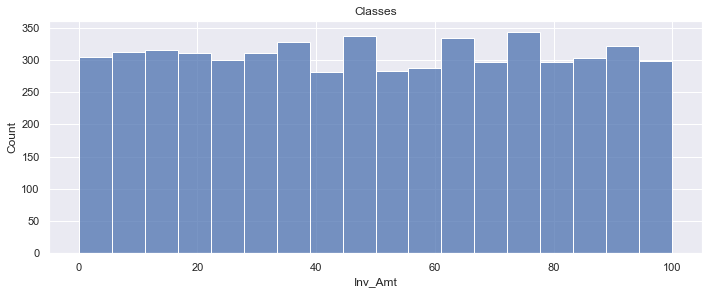

In [54]:
sns.set(rc={'figure.figsize':(11.7,4.27)})
sns.histplot( data= train_data, x="Inv_Amt").set_title("Classes")

#### Deeper analysis

<b> Vendor_Code

In [55]:
train_data[['TypeEnt','TypeEnt_number']] = train_data.Vendor_Code.str.split('-',expand=True)

In [56]:
train_data = train_data.drop(columns = 'TypeEnt')

In [57]:
len(train_data.TypeEnt_number.unique())  ## count or mean encoding

1253

In [58]:
tmp = train_data.groupby(['TypeEnt_number','Map_Product_Category'], as_index = False).agg(counts = ('Inv_Id','count'))
tmp["Rank"] = tmp.groupby(["TypeEnt_number"])["counts"].rank("dense", ascending=False)
tmp = tmp[tmp.Rank == 1]
map_rank =  dict(tmp[['TypeEnt_number','Map_Product_Category']].values)

In [59]:
train_data['ModeProductCategory_Vendor'] = train_data.TypeEnt_number.map(map_rank)

In [61]:
to_plot = train_data.groupby('ModeProductCategory_Vendor', as_index = False).agg(counts = ('Inv_Id','count')).sort_values('counts')

Text(0.5, 1.0, 'ModeProductCategory_Vendor')

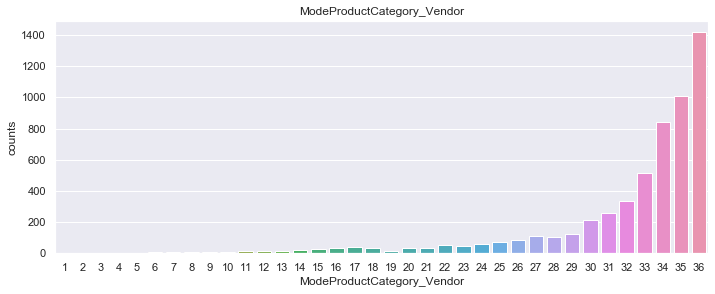

In [74]:
sns.set(rc={'figure.figsize':(11.7,4.27)})
sns.barplot( data= to_plot, y="counts", x = 'ModeProductCategory_Vendor').set_title("ModeProductCategory_Vendor")

apply custom map

<b> GCL code

In [69]:
train_data[['GCL','GCL_number']] = train_data.GL_Code.str.split('-',expand=True)

In [70]:
train_data = train_data.drop(columns = 'GCL')

In [73]:
train_data.GCL_number.unique()

array(['6100410', '2182000', '6050100', '6101400', '6050310', '6060100',
       '6100500', '6121905', '6020600'], dtype=object)

In [75]:
to_plot = train_data.groupby(['GCL_number','ModeProductCategory_Vendor'], as_index = False).agg(counts = ('Inv_Id','count')).sort_values('counts')

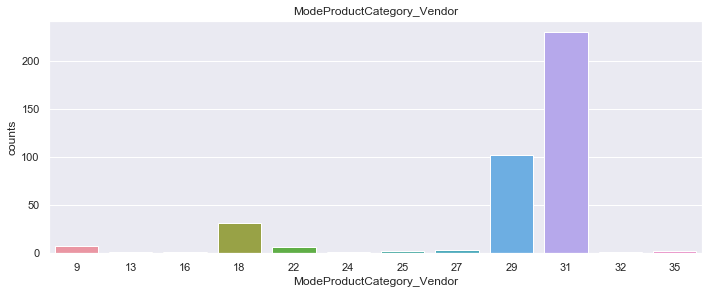

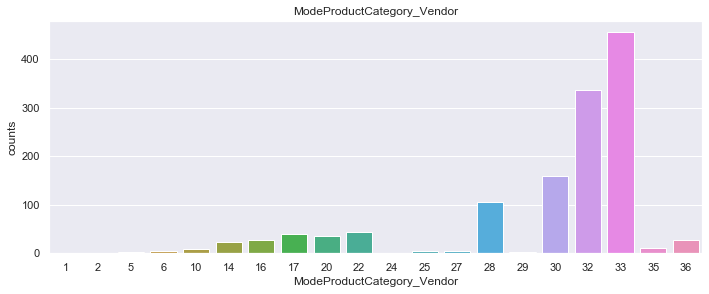

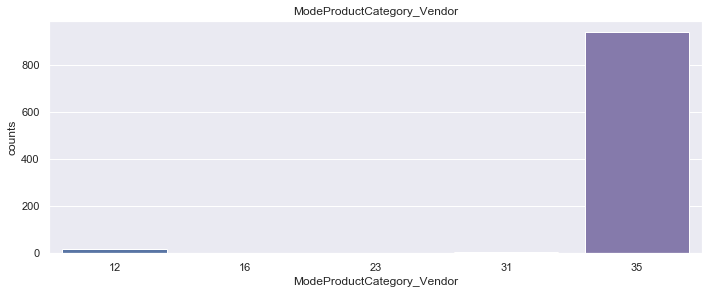

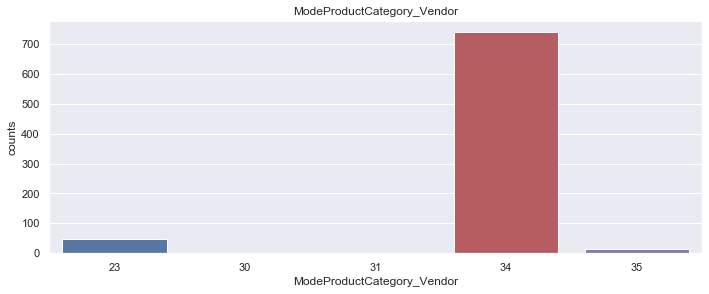

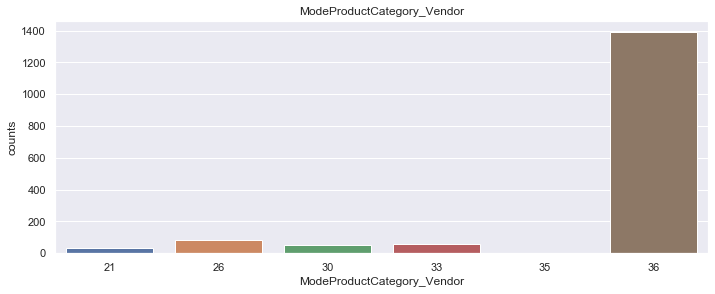

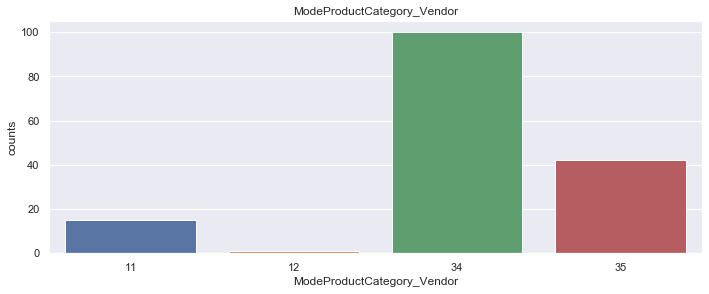

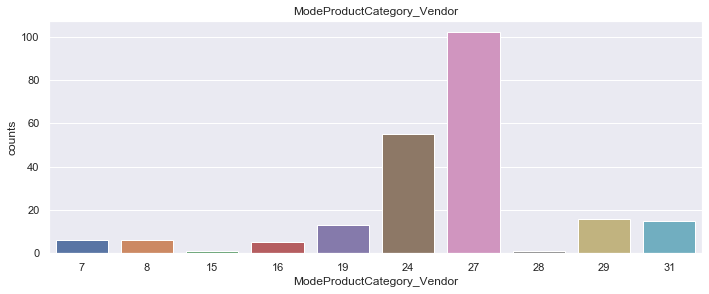

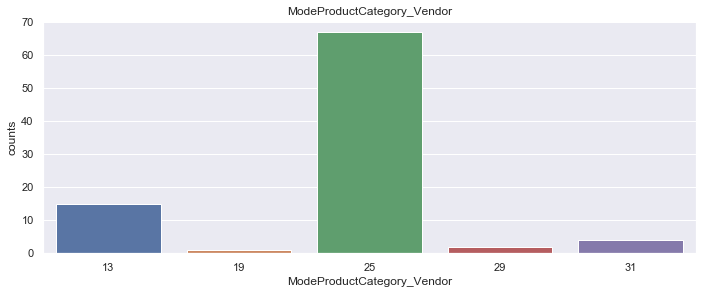

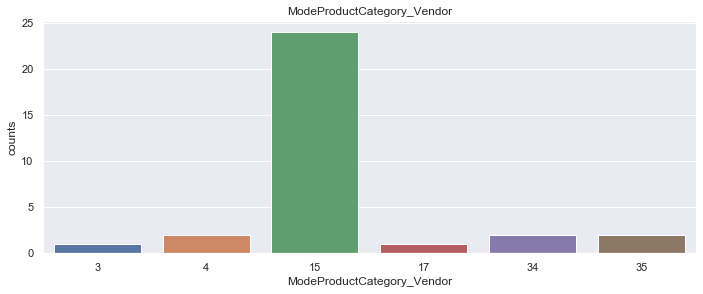

In [77]:
for i in train_data.GCL_number.unique():
    sns.set(rc={'figure.figsize':(11.7,4.27)})
    sns.barplot( data= to_plot[to_plot.GCL_number == i], y="counts", x = 'ModeProductCategory_Vendor').set_title("ModeProductCategory_Vendor")
    plt.show()

keep simple, apply ordinal encoder

<b> Inv_Amt

In [79]:
train_data.head()

,Inv_Id,Vendor_Code,GL_Code,Inv_Amt,Item_Description,Product_Category,Map_Product_Category,TypeEnt_number,ModeProductCategory_Vendor,GCL_number
0,15001,VENDOR-1676,GL-6100410,83.24,Artworking/Typesetting Production Jun 2009 Cha...,CLASS-1963,31,1676,31,6100410
1,15002,VENDOR-1883,GL-2182000,51.18,Auto Leasing Corporate Services Corning Inc /N...,CLASS-1250,33,1883,33,2182000
2,15004,VENDOR-1999,GL-6050100,79.02,Store Management Lease/Rent Deltona Corp Real ...,CLASS-1274,35,1999,35,6050100
3,15005,VENDOR-1771,GL-6101400,48.50,Store Construction General Requirements Coloni...,CLASS-1522,34,1771,34,6101400
4,15006,VENDOR-1331,GL-2182000,63.35,Jul 2015 Aydin Corp Contingent Labor/Temp Labo...,CLASS-1376,32,1331,32,2182000


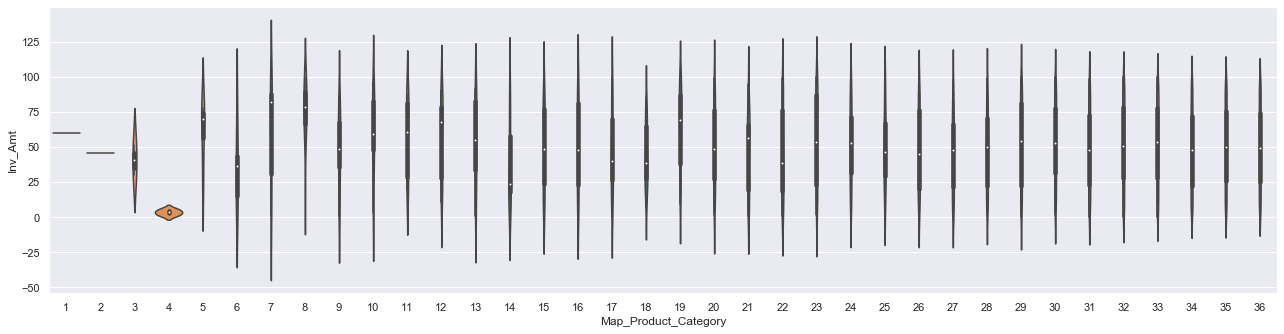

In [84]:
sns.set(rc={'figure.figsize':(22.0, 5.27)})
sns.violinplot(data=train_data, x =  'Map_Product_Category',y = 'Inv_Amt')